## Imports

In [1]:
import importlib

import explainers.gnninterpreter.models as models
from torch_geometric.data import Data
from utility_functions import *
import torch
import sys
sys.path.append("./explainers/XGNN")
sys.path.append("./graph_generation")
import HouseSet as HouseSet


from XGNNInterface  import XGNNInterface

C:\Users\hanne\anaconda3\envs\gnninterpreter\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
dataset = HouseSet.HouseSetCreator(1000, 40, 60).getDataset()
model = models.GCNClassifier(hidden_channels = 32, node_features = 3, num_classes=2)
PATH =  "./model/house_gnn_interpreter_model.pt"
model.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [3]:
def model_wrapper(x, edge_index):
    """
    Function to match output of GNNInterpreter models to XGNN models.
    """
    data = Data(x=x, edge_index= edge_index)
    forward = model(data)
    return forward["logits"], forward["probs"]

In [4]:
encoding_dict = one_hot_encoding(3)
cgd = lambda nx_graph: convertNxToData(nx_graph, encoding_dict)

In [5]:
def diffHyperparameters(starting_node, cl):
    reward_stepwise_li = [x* 0.2 for x in range(1,11-5)]
    roll_out_alpha_li = [0.5,1,3]
    
    res_li = []
    bestHype = (0,0)
    max_prob = 0
    for reward_stepwise in reward_stepwise_li:
        for roll_out_alpha in roll_out_alpha_li:
            explainer = XGNNInterface(5, 20, cl, 200, 3, model = model_wrapper,\
                                      convertNxToData = cgd, starting_node=starting_node,\
                                          checkpoint=False, reward_stepwise=reward_stepwise,\
                                              roll_out_alpha = roll_out_alpha) 
            graph,prob = explainer.train()
            print(f"Starting Node {starting_node}\n rew_step: {reward_stepwise} roll_out_alpha {roll_out_alpha}: prob {prob}")
            res_li.append((graph,prob))

            if prob >= max_prob:
                bestHype = (reward_stepwise,roll_out_alpha)
    
    print(f"best hyperparameters: \nreward_stepwise {bestHype[0]}\nroll_out_alpha: {bestHype[1]}")
    return max(res_li, key=lambda x:x[1])

Start training pipeline
Initializing Policy Nets
Initializing Policy Nets
loading the model
Starting Node 0
 rew_step: 0.2 roll_out_alpha 0.5: prob 0.1507103145122528
Start training pipeline
Initializing Policy Nets
Initializing Policy Nets
loading the model
Starting Node 0
 rew_step: 0.2 roll_out_alpha 1: prob 0.1507103145122528
Start training pipeline
Initializing Policy Nets
Initializing Policy Nets
loading the model
Starting Node 0
 rew_step: 0.2 roll_out_alpha 3: prob 0.1507103145122528
Start training pipeline
Initializing Policy Nets
Initializing Policy Nets
loading the model
Starting Node 0
 rew_step: 0.4 roll_out_alpha 0.5: prob 0.5823034644126892
Start training pipeline
Initializing Policy Nets
Initializing Policy Nets
loading the model
Starting Node 0
 rew_step: 0.4 roll_out_alpha 1: prob 0.18369868397712708
Start training pipeline
Initializing Policy Nets
Initializing Policy Nets
loading the model
Starting Node 0
 rew_step: 0.4 roll_out_alpha 3: prob 0.1507103145122528
Start

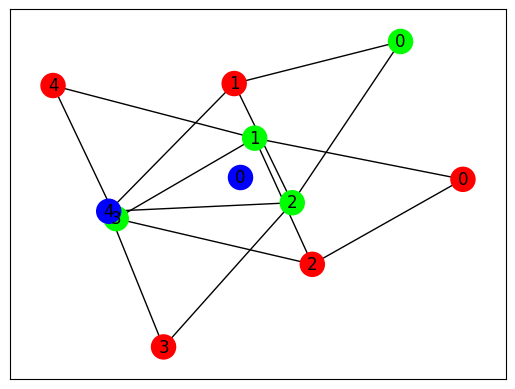

In [6]:
res_li_1 = []

for starting_node in [0,1,2]:
    graph, prob = diffHyperparameters(starting_node, 1)
    res_li_1.append((graph,prob))
    printGraph(graph)

In [8]:
res_li_1


[(Data(x=[5, 3], edge_index=[2, 7]), 0.5823034644126892),
 (Data(x=[5, 3], edge_index=[2, 7]), 0.17561762034893036),
 (Data(x=[1, 3], edge_index=[2, 0]), 0.08436326682567596)]

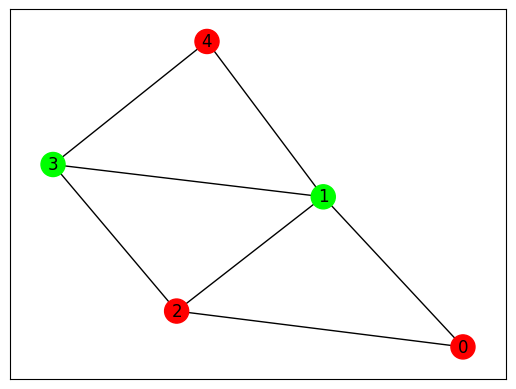

In [9]:
printGraph(res_li_1[0][0])

Start training pipeline
Initializing Policy Nets
Initializing Policy Nets
loading the model
Starting Node 0
 rew_step: 0.2 roll_out_alpha 0.5: prob 0.8721634745597839
Start training pipeline
Initializing Policy Nets
Initializing Policy Nets
loading the model
Starting Node 0
 rew_step: 0.2 roll_out_alpha 1: prob 0.6075056195259094
Start training pipeline
Initializing Policy Nets
Initializing Policy Nets
loading the model
Starting Node 0
 rew_step: 0.2 roll_out_alpha 3: prob 0.6400377154350281
Start training pipeline
Initializing Policy Nets
Initializing Policy Nets
loading the model
Starting Node 0
 rew_step: 0.4 roll_out_alpha 0.5: prob 0.8187324404716492
Start training pipeline
Initializing Policy Nets
Initializing Policy Nets
loading the model
Starting Node 0
 rew_step: 0.4 roll_out_alpha 1: prob 0.6498898863792419
Start training pipeline
Initializing Policy Nets
Initializing Policy Nets
loading the model
Starting Node 0
 rew_step: 0.4 roll_out_alpha 3: prob 0.8993995785713196
Start 

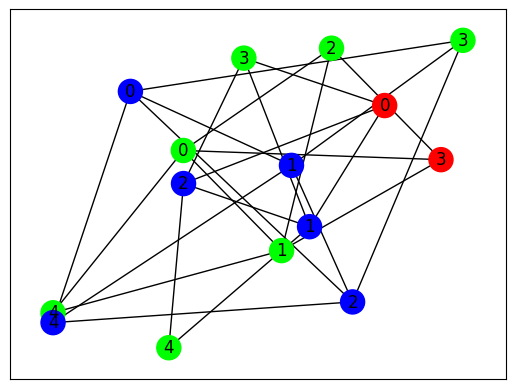

In [7]:
res_li_0 = []

for starting_node in [0,1,2]:
    graph, prob = diffHyperparameters(starting_node, 0)
    res_li_0.append((graph,prob))
    printGraph(graph)